## Unsupervised Learning 

Recall that in supervised machine learning you have input variables (X) and an output variable (Y ) and you use an algorithm to learn the mapping function from the input to the output. In contrast, in unsupervised machine learning you only have input data (X) and no corresponding output variables.

The goal here is to extract knowledge based on any patterns we'll be able to find - no labels will be addressed on liked and disliked.

Unsupervised learning problems can be further grouped into clustering and association problems. 

- **Clustering:** A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior. 

- **Association:** An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mglearn
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
import scipy.cluster.hierarchy as shc

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('../data/my_data.csv')

data.head()

id                 title        main_artist  \
0  0TLAptKgYxe7F0KewWH6X6  I Need A Forest Fire           Bon Iver   
1  2y0rHDTckWQ7of6tI1yc82            Naked Life         Oko Ebombo   
2  5nVE45ithgyVocZp5XLAk6     The Bug Collector  Haley Heynderickx   
3  66VuLX5s1nrZzzQqJqPbri            Simply Are       Arto Lindsay   
4  0X61Ud5Uzv44RvY3s1SsuO                Imogen        Nick Mulvey   

   danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.293   0.290    2   -11.596     1         0.696          0.875000   
1         0.624   0.321    0    -9.776     1         0.463          0.056000   
2         0.538   0.419   10    -9.705     1         0.777          0.329000   
3         0.682   0.694    7   -11.393     0         0.289          0.714000   
4         0.493   0.584    5    -6.894     1         0.850          0.000353   

   liveness  valence    tempo  duration_ms  time_signature  Like  
0    0.1000   0.0373  128.276       257220               4     1  
1    0.1030   0.3040   73.996       255030               4     1  
2    0.0967   0.5290   99.622       228460               4     1  
3    0.0961   0.9540  173.851       224107               4     1  
4    0.1140   0.2340   86.909       255533               4     1

In [3]:
data =  data.dropna()

#### Exploratory Analysis

In [4]:
data.dtypes

id                   object
title                object
main_artist          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
Like                  int64
dtype: object

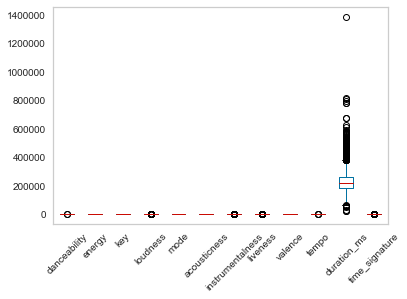

In [5]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']


data.boxplot(features, grid=False, rot=45, fontsize=10)


In [6]:
corr = data.corr()
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.069449  0.011599  0.284325 -0.116292   
energy                0.069449  1.000000  0.008971  0.740162 -0.050924   
key                   0.011599  0.008971  1.000000 -0.026078 -0.128468   
loudness              0.284325  0.740162 -0.026078  1.000000 -0.071169   
mode                 -0.116292 -0.050924 -0.128468 -0.071169  1.000000   
acousticness         -0.082151 -0.734904 -0.004972 -0.546401  0.060198   
instrumentalness     -0.151598 -0.178727  0.017704 -0.374960 -0.011266   
liveness             -0.082333  0.172567 -0.012319  0.076118 -0.001082   
valence               0.524706  0.392466  0.012256  0.393062 -0.052375   
tempo                -0.075189  0.196356 -0.005301  0.133902 -0.003159   
duration_ms          -0.377667  0.029181 -0.042191 -0.095073  0.006419   
time_signature        0.153249  0.158956 -0.006774  0.158481 -0.039653   
Like                 -0.186155 -0.593769 -0.002358 -0.560719  0.052877   

                  acousticness  instrumentalness  liveness   valence  \
danceability         -0.082151         -0.151598 -0.082333  0.524706   
energy               -0.734904         -0.178727  0.172567  0.392466   
key                  -0.004972          0.017704 -0.012319  0.012256   
loudness             -0.546401         -0.374960  0.076118  0.393062   
mode                  0.060198         -0.011266 -0.001082 -0.052375   
acousticness          1.000000          0.155672 -0.102908 -0.267006   
instrumentalness      0.155672          1.000000 -0.057162 -0.166354   
liveness             -0.102908         -0.057162  1.000000  0.044686   
valence              -0.267006         -0.166354  0.044686  1.000000   
tempo                -0.170702         -0.027460  0.037204  0.110738   
duration_ms          -0.086830          0.073062 -0.006002 -0.289192   
time_signature       -0.117837         -0.061689 -0.040693  0.119687   
Like                  0.518412          0.328778 -0.073478 -0.270170   

                     tempo  duration_ms  time_signature      Like  
danceability     -0.075189    -0.377667        0.153249 -0.186155  
energy            0.196356     0.029181        0.158956 -0.593769  
key              -0.005301    -0.042191       -0.006774 -0.002358  
loudness          0.133902    -0.095073        0.158481 -0.560719  
mode             -0.003159     0.006419       -0.039653  0.052877  
acousticness     -0.170702    -0.086830       -0.117837  0.518412  
instrumentalness -0.027460     0.073062       -0.061689  0.328778  
liveness          0.037204    -0.006002       -0.040693 -0.073478  
valence           0.110738    -0.289192        0.119687 -0.270170  
tempo             1.000000     0.030097        0.026279 -0.156059  
duration_ms       0.030097     1.000000       -0.041449  0.048685  
time_signature    0.026279    -0.041449        1.000000 -0.135920  
Like             -0.156059     0.048685       -0.135920  1.000000

In [7]:
data.describe()

danceability       energy          key     loudness         mode  \
count   2677.000000  2677.000000  2677.000000  2677.000000  2677.000000   
mean       0.607494     0.596098     5.493089    -8.314466     0.590960   
std        0.176068     0.229519     3.590966     3.791879     0.491749   
min        0.000000     0.007220     0.000000   -29.043000     0.000000   
25%        0.483000     0.430000     2.000000   -10.493000     0.000000   
50%        0.631000     0.613000     6.000000    -7.763000     1.000000   
75%        0.751000     0.776000     9.000000    -5.555000     1.000000   
max        0.963000     0.999000    11.000000     0.878000     1.000000   

       acousticness  instrumentalness     liveness      valence        tempo  \
count   2677.000000       2677.000000  2677.000000  2677.000000  2677.000000   
mean       0.366334          0.120983     0.180301     0.491359   120.738766   
std        0.317358          0.254196     0.150865     0.245985    30.854267   
min        0.000002          0.000000     0.019700     0.000000     0.000000   
25%        0.066300          0.000001     0.094900     0.289000    95.412000   
50%        0.288000          0.000301     0.120000     0.498000   117.582000   
75%        0.635000          0.052600     0.210000     0.688000   140.084000   
max        0.994000          0.976000     0.992000     0.980000   212.117000   

        duration_ms  time_signature         Like  
count  2.677000e+03     2677.000000  2677.000000  
mean   2.340140e+05        3.932013     0.495704  
std    8.389098e+04        0.372658     0.500075  
min    2.532000e+04        0.000000     0.000000  
25%    1.844210e+05        4.000000     0.000000  
50%    2.179400e+05        4.000000     0.000000  
75%    2.638160e+05        4.000000     1.000000  
max    1.388720e+06        5.000000     1.000000

### Data Preprocessing: Feature Transformation

I performed feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features.

Given that HAC deals with ‘distances’ — abstract or otherwise — we need to standard-scale our data before feeding it into the clustering algorithm. 
- This ensures that our final results are not skewed by feature units. 
- For example, tempo typically ranges between 70 and 180 beats per minute, whereas most other measures fall somewhere between 0 and 1. Without scaling, two songs with very different tempos would always be very ‘far apart’, even if they were identical on the other metrics.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[features])

features_scaled = scaler.transform(data[features])


## PCA: Principal Component Analysis

Principal Component Analysis (PCA) is one of the most common linear dimensionality reduction techniques. It emphasizes variation and brings out strong patterns in a dataset. In other words, it takes all the variables then represents it in a smaller space while keeping the nature of the original data as much as possible. 

- The first principal component will encompass as much of the dataset variation as possible in 1 dimension, 
- the second component will encompass as much as possible of the remaining variation as possible while remaining orthogonal to the first, and so on

### PCA with 3 components: 3D visualization

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
df_pca = pd.DataFrame(data=pca.fit_transform(features_scaled), columns=['PC1','PC2','PC3'])

In [10]:
pca.components_
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.24690591 0.1378979  0.0944993 ]


Text(0, 0.5, 'Principal components')

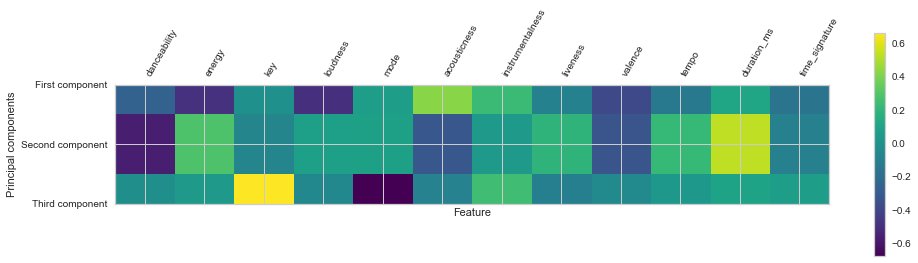

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(data[features].columns)),data[features], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [12]:

df_pca_fix = df_pca.merge(data, left_index=True, right_index=True)
df_pca_fix = df_pca_fix[['PC1', 'PC2', 'PC3', 'title', 'main_artist', 'danceability']]

df_pca_fix.head()

PC1       PC2       PC3                 title        main_artist  \
0  3.467091  1.190121 -0.363528  I Need A Forest Fire           Bon Iver   
1  1.427270 -0.436844 -1.636705            Naked Life         Oko Ebombo   
2  1.505098 -0.766795  0.387902     The Bug Collector  Haley Heynderickx   
3 -0.496300 -0.527929  1.793625            Simply Are       Arto Lindsay   
4  1.189843  0.089659 -0.827493                Imogen        Nick Mulvey   

   danceability  
0         0.293  
1         0.624  
2         0.538  
3         0.682  
4         0.493

In [13]:
# Plot the PCA
px.scatter_3d(df_pca_fix, 
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    title='Principal Component Analysis Projection (3-D)',
                    color='danceability', 
                    size=np.ones(len(df_pca_fix)), 
                    size_max=5,
                    height=600,
                    hover_name='title',
                    hover_data=['main_artist'],
                    color_continuous_scale=px.colors.cyclical.mygbm[:-6])

####  We can see each song position and its distance to other songs based on the audio features that have been transformed.

Most points are concentrated on the green-eish areas.

The mapping also confirms that danceability does correlate with PC2 to some extent.

'Am I boy? Am I a girl? Do I really care' (fyi a liked song) is on the opposite side to the way way less dance level with Hellowen's 'Hallowen

### Dimensionality Reduction with n number of components

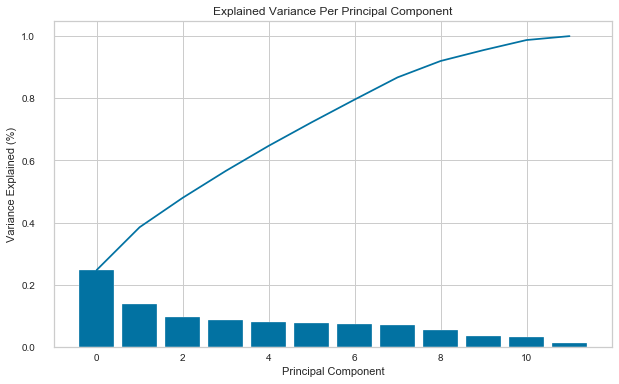

In [14]:
pca = PCA()
df_pca = pca.fit_transform(features_scaled)


# Investigate the variance accounted for by each principal component.

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

Based on the PCA plot, the variance explained becomes extremely low after 10 components and it does not change afterwards. So I tried with 10 components.


In [15]:
#Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=10)
df_pca = pca.fit_transform(features_scaled)

Each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). 

The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

In [16]:
pca.components_
pca.explained_variance_ratio_

array([0.24690591, 0.1378979 , 0.0944993 , 0.08637755, 0.08097935,
       0.07580409, 0.07319453, 0.07154123, 0.05270338, 0.03513562])

## Clustering Techniques

- Clustering is the task of partitioning the dataset into groups of similarity called clusters

- Clustering algorithms assign a number to each datapoint indicating which cluster it belongs to.

### Data Clustering with K-Means


- The main idea behind k-means clustering is that we choose how many clusters we would like to create (typically we call that number k). We choose this based on domain knowledge (maybe we have some market research on the number of different types of groups we expect to see in our customers?), based on a 'best-guess', or randomly.

- In the end you are left with areas that identify in which a cluster a newly assigned point would be  classified.

#### 2D Visualization --> 2 clusters

In [17]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(features_scaled)

data_2 = data.copy()
data_2['labels'] = model.labels_

In [18]:
data_2['labels'].value_counts()

0    1706
1     971
Name: labels, dtype: int64

In [19]:
data_2.groupby('labels').mean()

danceability    energy       key   loudness      mode  acousticness  \
labels                                                                        
0           0.643959  0.726817  5.467175  -6.338705  0.566237      0.196167   
1           0.543426  0.366431  5.538620 -11.785783  0.634398      0.665309   

        instrumentalness  liveness   valence       tempo    duration_ms  \
labels                                                                    
0               0.062760  0.195443  0.584827  125.106880  227320.015826   
1               0.223279  0.153698  0.327140  113.064201  245775.075180   

        time_signature      Like  
labels                            
0             3.978898  0.271981  
1             3.849640  0.888774

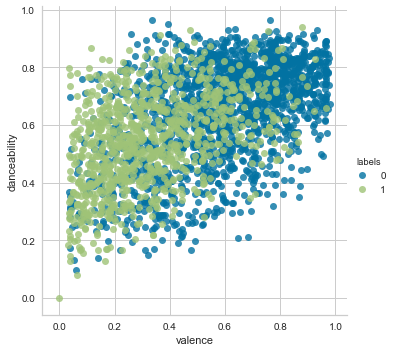

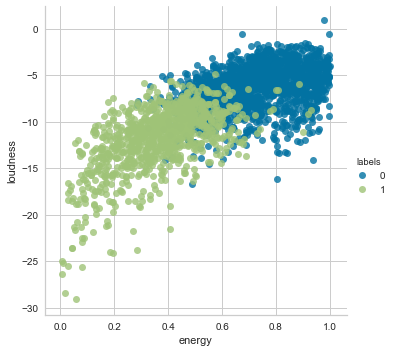

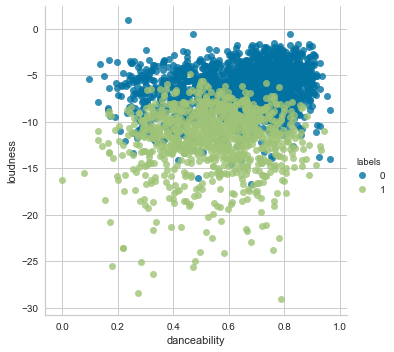

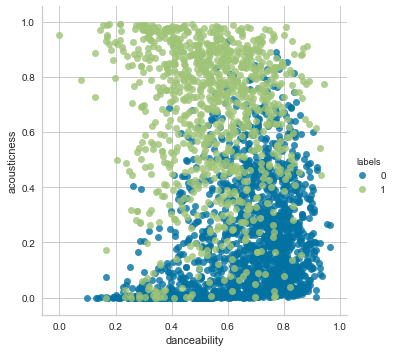

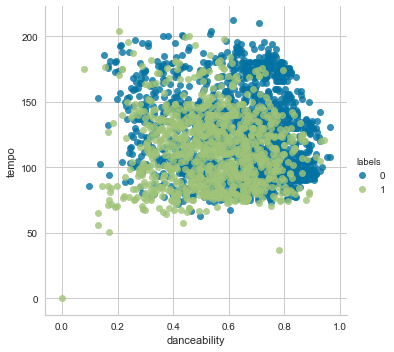

In [20]:
sns.lmplot(data=data_2, x='valence', y='danceability', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data_2, x='energy', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data_2, x='danceability', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data_2, x='danceability', y='acousticness', hue='labels',  fit_reg=False, legend=True, legend_out=True)
sns.lmplot(data=data_2, x='danceability', y='tempo', hue='labels',  fit_reg=False, legend=True, legend_out=True)

#### Optimal Number of Clusters

One of the hardest and most important parameters to optimize is the number of clusters. 

- Having too many clusters might mean that we haven't actually learned much about the data - the whole point of clustering is to identify a relatively small number of similarities that exist in the dataset. 

- Too few clusters might mean that we are grouping unlike samples together artificially. 

There are many different methods for choosing the appropriate number of clusters, but one common method is calculating a metric for each number of clusters, then plotting the error function vs the number of clusters. 

##### Yellowbrick's KElbowVisualizer:

Yellowbrick's KElbowVisualizer implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for K.



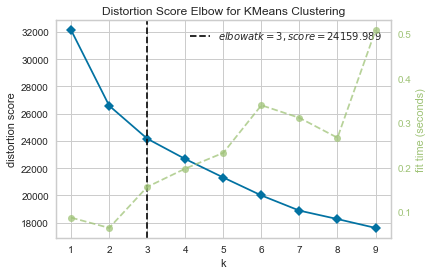

In [21]:
X = features_scaled
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#fits the model for a range of  K  values from 1 to 9, which is set by the parameter k=(1,10). 
#we see that the model is fit with 3 clusters - we can see an "elbow" in the graph, 
#which in this case we know to be the optimal number since we created our synthetic dataset with 8 clusters of points.


#### Try with 9 clusters

In [22]:
kmean = KMeans(n_clusters=9)
kmean.fit(features_scaled)

pred = kmean.labels_

data['labels'] = model.labels_

data.head()

id                 title        main_artist  \
0  0TLAptKgYxe7F0KewWH6X6  I Need A Forest Fire           Bon Iver   
1  2y0rHDTckWQ7of6tI1yc82            Naked Life         Oko Ebombo   
2  5nVE45ithgyVocZp5XLAk6     The Bug Collector  Haley Heynderickx   
3  66VuLX5s1nrZzzQqJqPbri            Simply Are       Arto Lindsay   
4  0X61Ud5Uzv44RvY3s1SsuO                Imogen        Nick Mulvey   

   danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.293   0.290    2   -11.596     1         0.696          0.875000   
1         0.624   0.321    0    -9.776     1         0.463          0.056000   
2         0.538   0.419   10    -9.705     1         0.777          0.329000   
3         0.682   0.694    7   -11.393     0         0.289          0.714000   
4         0.493   0.584    5    -6.894     1         0.850          0.000353   

   liveness  valence    tempo  duration_ms  time_signature  Like  labels  
0    0.1000   0.0373  128.276       257220               4     1       2  
1    0.1030   0.3040   73.996       255030               4     1       1  
2    0.0967   0.5290   99.622       228460               4     1       1  
3    0.0961   0.9540  173.851       224107               4     1       5  
4    0.1140   0.2340   86.909       255533               4     1       1

In [23]:
data['labels'].value_counts()

1    502
4    492
7    475
6    348
5    310
2    207
3    122
8    119
0    102
Name: labels, dtype: int64

In [24]:
#perform k means with all songs data
all_songs = pd.read_csv('../data/all_songs.csv')

In [25]:
#features scaling 
scaler = StandardScaler()
scaler.fit(all_songs[features])

all_songs_features_scaled = scaler.transform(all_songs[features])

In [26]:
len(all_songs_features_scaled)

5255

In [27]:
kmean = KMeans(n_clusters=9)
kmean.fit(all_songs_features_scaled)

pred = kmean.labels_
all_songs['labels'] = pred

all_songs.head()

id               title     main_artist  danceability  \
0  2aQ8NyRJcsQFgb8jwUil90        Que Bandeira          Evinha         0.755   
1  6d4KqeYESkFHMirUgE1Aa3              Não Vá        Tim Maia         0.658   
2  2OoOgl80tDTElnbMYfhJyH             Reggins  The Blackbyrds         0.645   
3  5voWjUklIhjnNQU5aZCIm4  Dreaming About You  The Blackbyrds         0.744   
4  2jHa1UWWuouaoFqE8I7W77    Never Let Her Go     David Gates         0.576   

   energy  key  loudness  mode  acousticness  instrumentalness  liveness  \
0   0.537    1   -10.679     1       0.75600          0.000003    0.3550   
1   0.741    2   -10.495     1       0.04430          0.001280    0.0603   
2   0.383    5   -16.549     0       0.00495          0.611000    0.0727   
3   0.292    4   -16.592     0       0.26500          0.095900    0.0738   
4   0.399    8   -14.764     1       0.23300          0.000022    0.1040   

   valence    tempo  duration_ms  time_signature  labels  
0    0.811   93.393       149420               4       7  
1    0.928  103.283       307037               4       7  
2    0.943   97.238       244800               4       4  
3    0.881   96.366       352400               4       1  
4    0.621   84.049       188813               4       6

In [28]:
all_songs['labels'].value_counts()

1    1031
7    1001
6     975
2     581
8     550
4     510
0     290
3     271
5      46
Name: labels, dtype: int64

In [29]:
#export csv with cluste
all_songs = pd.read_csv('../data/all_songs.csv')

Unfortunately, the k-means model has no intrinsic measure of probability or uncertainty of cluster assignments (although it may be possible to use a bootstrap approach to estimate this uncertainty). For this, we must think about generalizing the model.


### Gaussian Mixture Models


The k-means clustering model explored in the previous section is simple and relatively easy to understand, but its simplicity leads to practical challenges in its application. 

In particular, the **non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.**

In this section we will take a look at **Gaussian mixture models (GMMs)**, which can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.

- One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. 

- This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster. We can visualize this cluster model with the following function:

In [30]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

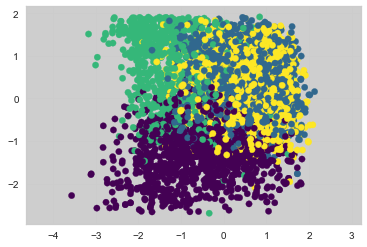

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, all_songs_features_scaled)

### HAC: Hierarchical Agglomerative Clustering

how the algorithm thinks of the ‘distance’ between two existing clusters is variable. Scikit-learn provides three such ‘linkage criteria’ as part of its HAC package:


###### HAC starts off by viewing each individual point as its own cluster of one.
It then merges the two existing clusters that are ‘closest’ to each other (note; the definition of ‘distance’ in this context is changeable — we’ll explore this later on). The HAC algorithm will iteratively merge ‘close’ clusters, until it reaches its natural conclusion where all data points belong to one single cluster.

- ward (default): picks the two clusters to merge in a way that the variance within all clusters increases the least.Generally, this leads to clusters that are fairly equally sized.
- average: merges the two clusters that have the smallest average distance between all the points.
- complete (or maximum linkage): merges the two clusters that have the smallest maximum distance between their points.


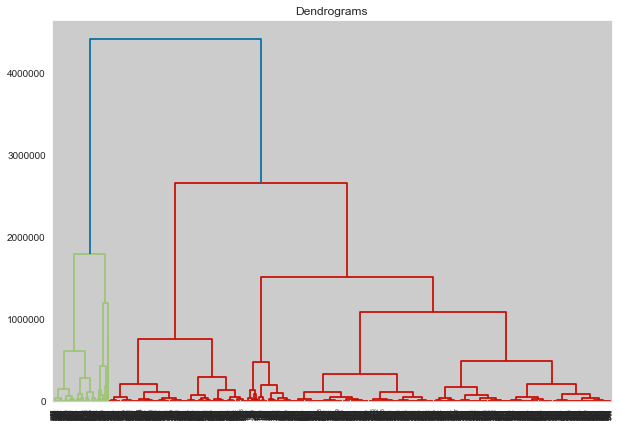

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data[features], method='ward'))